# Imports

In [1]:
import sys
sys.path.append('/workspaces/SignLanguageTranslator')

import importlib
from SignLanguageTranslator.utils import visualization as vis

# importlib.reload(vis)

In [2]:
# math
import numpy as np
import torch

# Image processing
# import cv2
import PIL 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import moviepy.editor as mpy
from moviepy.video.io.bindings import mplfig_to_npimage
from moviepy.video.VideoClip import DataVideoClip

# directory
import os
from glob import glob

# notebook
from tqdm.auto import tqdm
from IPython.display import clear_output, Image, Video

# basic matplotlib video

In [19]:
x = np.linspace(0, 5, 11)

fig = plt.figure(facecolor="white")
base_plot = plt.plot(x, x, 'o-')

def data_to_frame(t):
    y_t = x ** t
    base_plot[0].set_ydata(y_t)
    base_plot[0].set_label(f'pow: {t:.2f}')
    plt.legend()
    plt.ylim(-1, max(y_t))

    return mplfig_to_npimage(fig)

timesteps = np.linspace(1, 5, 30)
clip = DataVideoClip(timesteps, data_to_frame, fps=15)

clip.write_videofile(os.path.join("outputs","graph_power.mp4"))

clear_output()
_ = plt.clf()

mpy.ipython_display(os.path.join("outputs","graph_power.mp4"))

<Figure size 640x480 with 0 Axes>

# Plot Landmarks

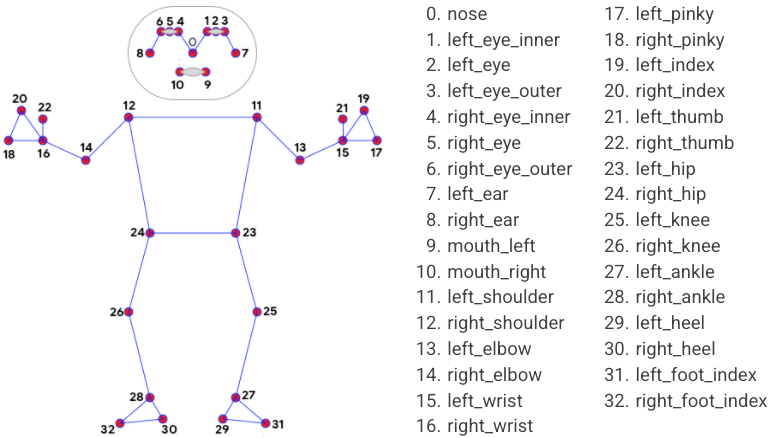

In [10]:
Image('data/mediapipe_pose_tracking_full_body_landmarks.png')

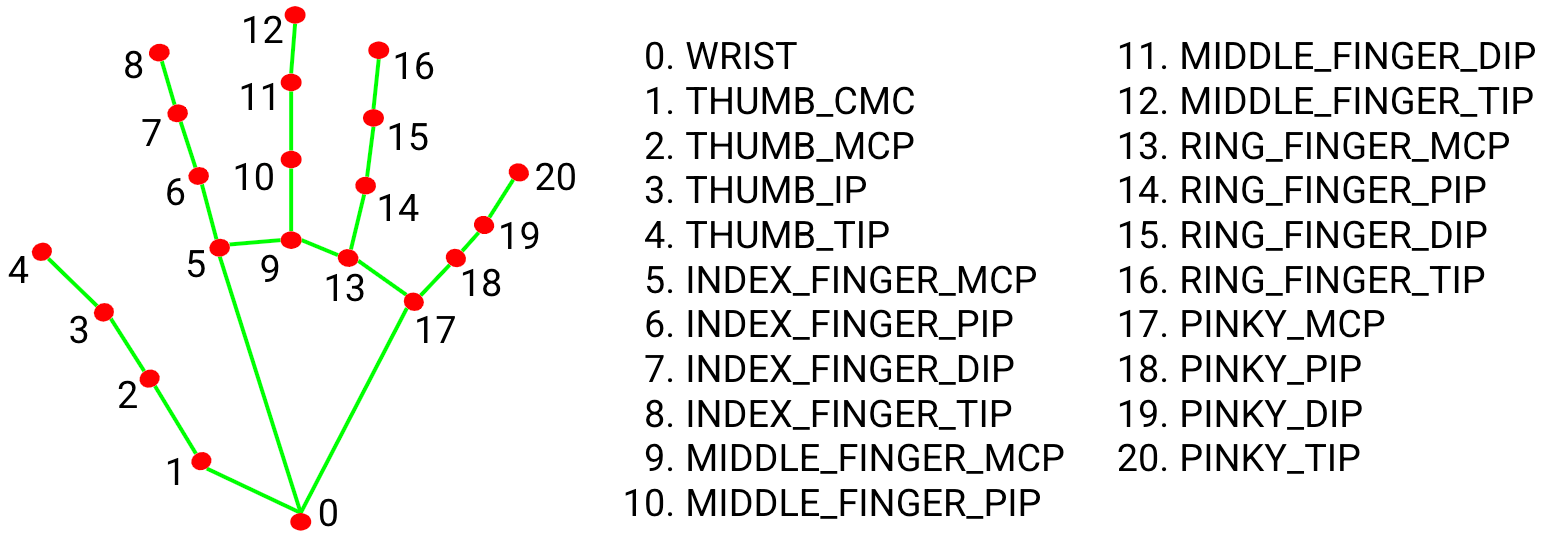

In [11]:
Image('data/mediapipe_hand_landmarks.png')

In [7]:
word='d-F'
word='نانی'

In [8]:
multi_frame_landmarks = np.loadtxt(f'../datasets/pose_{word}_person205_front.csv', skiprows=1,delimiter=',')
landmarks = multi_frame_landmarks[30].reshape((-1,4))[:,:3]
landmarks.shape

(33, 3)

In [18]:
importlib.reload(vis)

<module 'SignLanguageTranslator.utils.visualization' from '/workspaces/SignLanguageTranslator/SignLanguageTranslator/utils/visualization.py'>

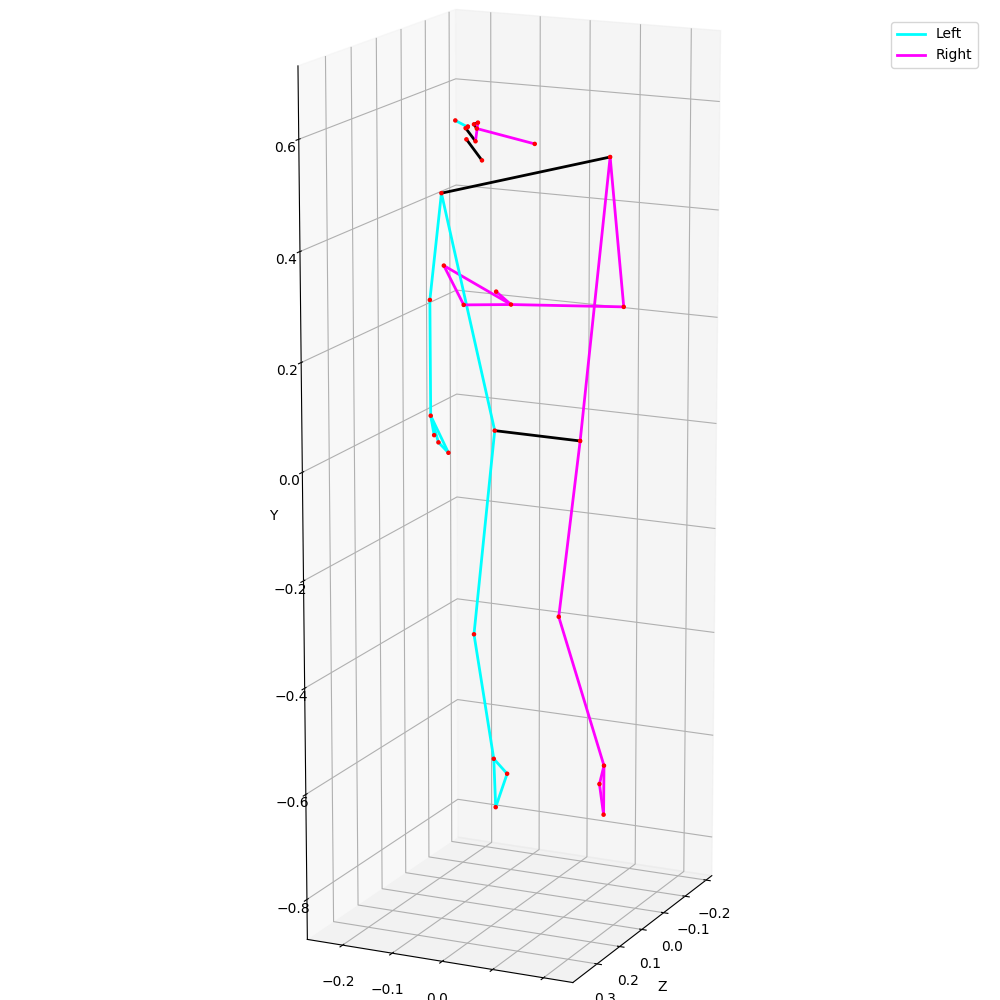

In [17]:
PIL.Image.fromarray(vis.landmarks_to_image(-landmarks))

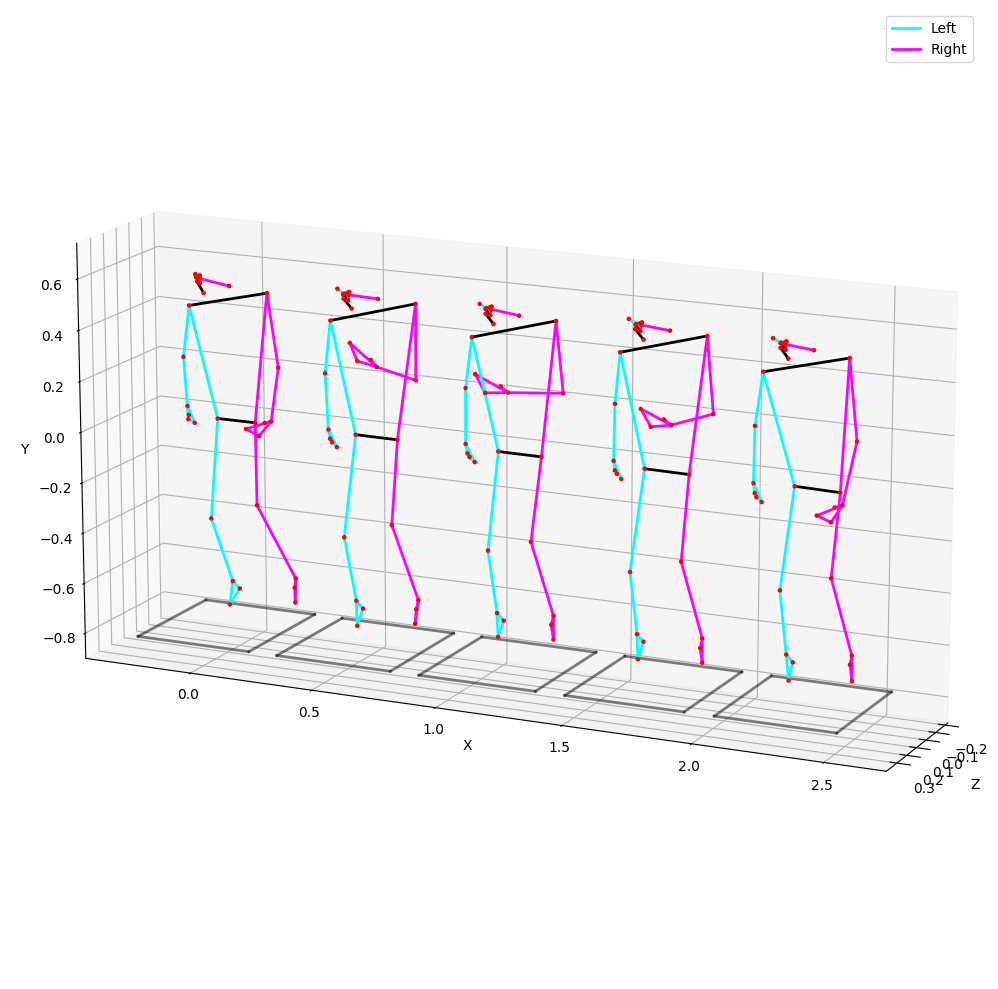

In [23]:
_multi_frame_landmarks = multi_frame_landmarks.reshape((-1, 33, 4))[::15,:,:3]
fig, ax = vis.plot_multi_frame_landmarks(-_multi_frame_landmarks)
plt.savefig(f"outputs/{word}.png", bbox_inches = 'tight')
plt.close()
Image(f"outputs/{word}.png")

In [20]:
_multi_frame_landmarks = multi_frame_landmarks.reshape((-1, 33, 4))[:,:,:3]
clip = vis.multi_frame_landmarks_to_video(-_multi_frame_landmarks, fps=25)

clip.write_videofile(os.path.join("outputs",f"{word}.mp4"))

clear_output()

Video(os.path.join("outputs",f"{word}.mp4"), html_attributes='loop autoplay')

## Hand

In [21]:
hand_multi_frame_landmarks = np.loadtxt(f'../datasets/hand_{word}_person205_front.csv', skiprows=1,delimiter=',')
hand_multi_frame_landmarks = hand_multi_frame_landmarks.reshape((-1,42,3))

landmarks = hand_multi_frame_landmarks[30].copy()
landmarks.shape

(42, 3)

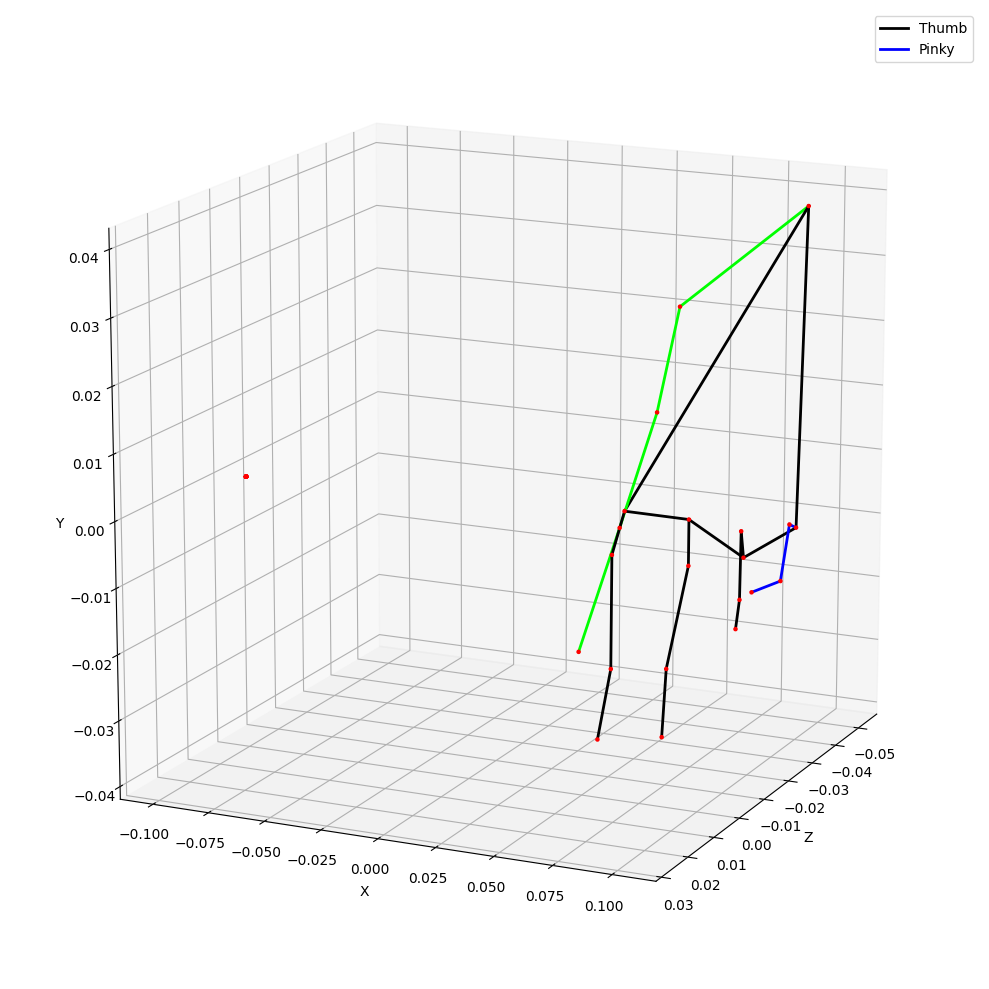

In [22]:
fig, ax = vis.plot_landmarks(vis.space_out_hands(-landmarks))

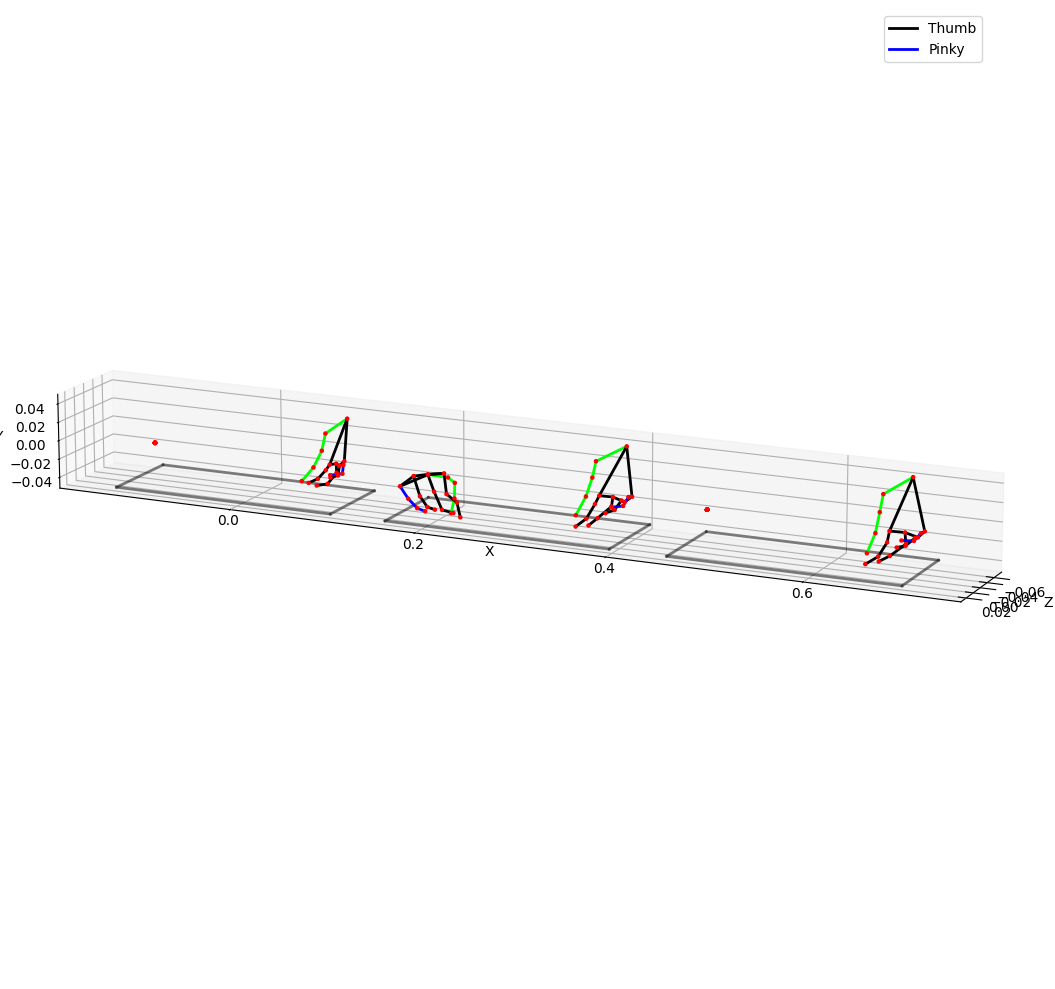

In [24]:
_multi_frame_landmarks = hand_multi_frame_landmarks[1::25]
fig, ax = vis.plot_multi_frame_landmarks(-_multi_frame_landmarks)

plt.savefig(f"outputs/{word}_hand.png", bbox_inches = 'tight')
plt.close()
Image(f"outputs/{word}_hand.png")

In [26]:
importlib.reload(vis)

<module 'SignLanguageTranslator.utils.visualization' from '/workspaces/SignLanguageTranslator/SignLanguageTranslator/utils/visualization.py'>

In [27]:
clip = vis.multi_frame_landmarks_to_video(-hand_multi_frame_landmarks, fps=25)

clip.write_videofile(os.path.join("outputs",f"{word}_hand.mp4"))

clear_output()

Video(os.path.join("outputs",f"{word}_hand.mp4"), html_attributes='loop autoplay')

Bad pipe message: %s [b'r\xe7\xc0h\xf9\xd8\xf1\x19\xea/\xa4(\xe2?\xa1\x83f\x18 \x1b\xbb\x0c\xb2q\xd6\xbd\xcd\xe4r\xcf}\x1e\x9bk\x13']
Bad pipe message: %s [b"'*\x15;\xbddx\x02\x1be\xbb\xbeT\xcbM\xa0\xacG\x00\x00\xf4\xc00\xc0,\xc0(\xc0$\xc0\x14\xc0\n\x00\xa5\x00\xa3\x00\xa1\x00\x9f\x00k\x00j\x00i\x00h\x009\x008\x007\x006\x00\x88\x00\x87\x00\x86\x00\x85\xc0\x19\x00\xa7\x00m\x00:\x00\x89\xc02\xc0.\xc0*\xc0&\xc0\x0f\xc0\x05\x00\x9d\x00=\x005\x00\x84\xc0/\xc0+\xc0'\xc0#\xc0\x13\xc0\t\x00\xa4\x00\xa2\x00\xa0\x00\x9e\x00g\x00@\x00?\x00>\x003\x002\x001\x000\x00\x9a\x00\x99\x00\x98\x00\x97\x00E\x00D\x00C\x00B\xc0\x18\x00\xa6\x00l\x004\x00\x9b\x00F\xc01\xc0-\xc0)\xc0%\xc0\x0e\xc0\x04\x00\x9c\x00<\x00/\x00\x96\x00A\x00\x07\xc0\x11\xc0\x07\xc0\x16\x00\x18\xc0\x0c\xc0\x02\x00\x05\x00"]
Bad pipe message: %s [b'\xf0\xd0\xb6\x15+D\xef;\xde\x94\xe1b%\xd3-\xc7\xbfj']
Bad pipe message: %s [b"\x8d\xff\xd8M\x8e\xab\xf8E\xd4\xb0\xd0-\xeefg\xden\xfb\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\

: 